In [ ]:
import glob, os
import numpy as np

import matplotlib.pyplot as plt

# from pypcd import pypcd

# Location of logs

log_dir = '/home/airstation-04/caric_docker/ws_caric/src/caric_mission/logs_star23'

file_name = os.path.basename(log_dir) + "_mission_score.png"

output_dir = "/home/airstation-04/caric_plots"
os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists

# File name for the saved plot
plot_file_path = os.path.join(output_dir, file_name)


Total score: 1632.828006848693


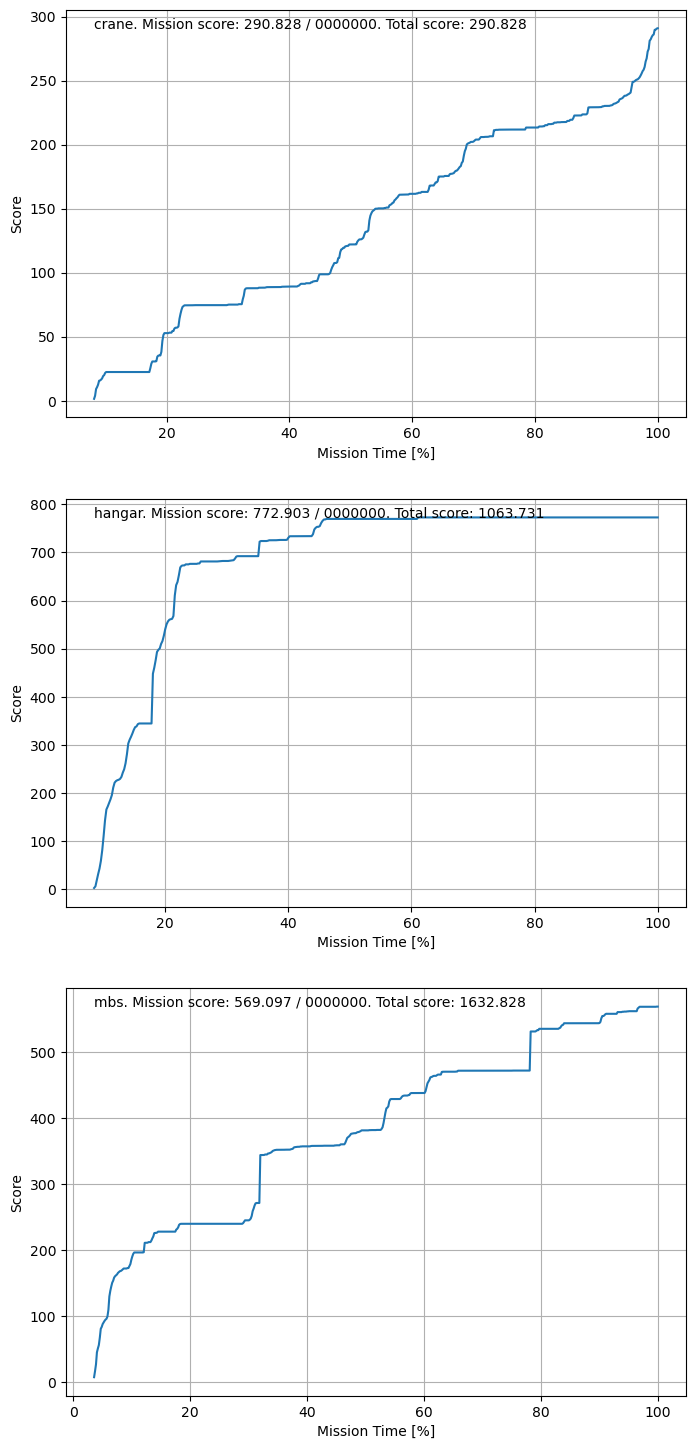

In [20]:
total_score = 0

envs = glob.glob(log_dir + '/*')
envs = sorted(envs)

fig = plt.figure(figsize=(8, 6*len(envs)))

# Find the environments
for idx, env in enumerate(envs):
    
    # Get the env name
    env_name = os.path.basename(env)

    # Get the maximum score
    # interest_points = pypcd.PointCloud.from_path('../models/' + env_name + '/' + env_name + '_interest_points.pcd').pc_data

    # Find the logs inside
    score_logs = glob.glob(env + '/*.csv')

    # Score stamp
    score_stamped = []

    # Log the data
    for log in score_logs:
        stamp = os.path.basename(log).replace('.csv', '').split('_')
        timestamp = int(stamp[1]) + int(stamp[2])/1.0e9
        score = (np.array(np.loadtxt(log, delimiter=',', skiprows=1))).reshape((-1, 8))[:, 6]
        score = np.sum(score)
        # print(timestamp, score)
        score_stamped.append([timestamp, score])

    score_stamped = np.array(score_stamped)
    score_stamped = score_stamped[score_stamped[:, 0].argsort()]
    score_stamped[:, 0] = score_stamped[:, 0]/score_stamped[-1, 0]*100

    # Max score
    max_score = score_stamped[-1, 1]
    total_score += max_score

    fig.add_subplot(len(envs), 1, idx+1)

    plt.plot(score_stamped[:, 0]/score_stamped[-1, 0]*100, score_stamped[:, 1])

    # Put the text name
    plt.text(score_stamped[0, 0], score_stamped[-1, 1], f'{env_name}. Mission score: {score_stamped[-1, 1]:.3f} / 0000000. Total score: {total_score:.3f}')

    plt.grid('on')
    plt.xlabel('Mission Time [%]')
    plt.ylabel('Score')

plt.savefig(plot_file_path, dpi=300)  # Save with high resolution

print(f'Total score: {total_score}')